# 10_python : 파이썬을 이용한 한국어 자연어처리

* 코난아카데미 : 데이터분석 기초
* 발표자 : 김무성

# 차례 

# 추천 사이트

# 추천 자료

# Text exploration

In [1]:
# pip install nltk
# pip install konlpy
# pip install gensim

%matplotlib inline

## Read document

In [2]:
# As example documents, we select Jane Austen's Emma for English, and Korea National Assembly's bill number 1809890 for Korean. Otherwise, you can use a document of your own with open('some_file.txt').read().

In [3]:
from konlpy.corpus import kobill    # Docs from pokr.kr/bill
files_ko = kobill.fileids()         # Get file ids
doc_ko = kobill.open('1809890.txt').read()

In [4]:
print doc_ko[:100]

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이


## Tokenize

In [5]:
# There are numerous ways to tokenize a document.
# Here, we use nltk.regexp_tokenize for English, konlpy.tag.Twitter.morph for Korean text.

In [6]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.morphs(doc_ko)

In [7]:
for token in tokens_ko[:10] :
    print token

지방공무원법
일부
개정
법률
안
(
정의화
의원
대표
발의


## Load tokens with nltk.Text()

In [8]:
import nltk
ko = nltk.Text(tokens_ko, name= u'대한민국 국회 의안 제 1809890호')   # For Python 2, input `name` as u'유니코드'

In [9]:
# nltk.Text() is a convenient way to explore a current document. For Python 2, name has to be input as u'유니코드'. If you are using Python 2, use u'유니코드' for input of all following Korean text.

### Tokens

In [10]:
len(ko.tokens)       # returns number of tokens (document length)

1707

In [11]:
len(set(ko.tokens))  # returns number of unique tokens

476

In [12]:
ko.vocab()                  # returns frequency distribution

FreqDist({u'.': 61, u'\uc758': 46, u'\uc721\uc544\ud734\uc9c1': 38, u'\uc744': 34, u'(': 27, u'\uc774': 26, u',': 26, u')': 26, u'\uc5d0': 24, u'\uc790': 24, ...})

### Plot frequency distributions

In [13]:
# 맥의 경우
from matplotlib import font_manager, rc
font_fname = '/Library/Fonts/AppleGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

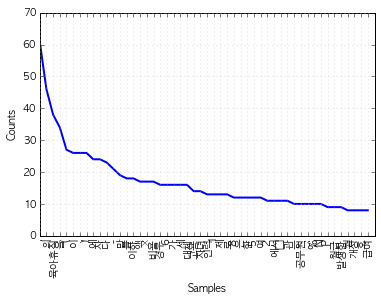

In [14]:
ko.plot(50)     # Plot sorted frequency of top 50 tokens

### Count

In [15]:
ko.count(u'초등학교')   # Counts occurrences

6

### Dispersion plot

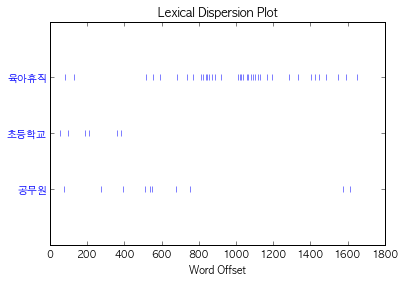

In [16]:
ko.dispersion_plot([u'육아휴직', u'초등학교', u'공무원'])

### Concordance

In [17]:
ko.concordance(u'초등학교')

Displaying 6 of 6 matches:
 ․ 김정훈 김학송 의원 ( 10 인 ) 제안 이유 및 주요 내용 초등학교 저학년 의 경우 에도 부모 의 따뜻한 사랑 과 보살핌 이 필요 한
 을 할 수 있는 자녀 의 나이 는 만 6 세 이하 로 되어 있어 초등학교 저학년 인 자녀 를 돌보기 위해서 는 해당 부모님 은 일자리 를 
 다 . 제 63 조제 2 항제 4 호 중 “ 만 6 세 이하 의 초등학교 취학 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 
 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 에는 초등학교 2 학년 이하 를 말한 다 ) 의 자녀 를 ” 로 한 다 . 부 
 . ∼ 3 . ( 현행 과 같 음 ) 4 . 만 6 세 이하 의 초등학교 취 4 . 만 8 세 이하 ( 취학 중인 경우 학 전 자녀 를 양
세 이하 ( 취학 중인 경우 학 전 자녀 를 양육 하기 위하 에는 초등학교 2 학년 이하 를 여 필요하거 나 여자 공무원 이 말한 다 ) 의


### Find similar words

In [18]:
ko.similar(u'자녀')

논의


In [19]:
ko.similar(u'육아휴직')

### Collocations

In [20]:
ko.collocations()

초등학교 저학년; 육아휴직 대상자


# Tagging and chunking

In [21]:
# Until now, we used delimited text, namely tokens, to explore our sample document. Now let's classify words into given classes, namely part-of-speech tags, and chunk text into larger pieces.

## POS tagging

In [22]:
# There are numerous ways of tagging a text. Among them, the most frequently used, and developed way of tagging is arguably POS tagging.

In [23]:
from konlpy.tag import Twitter; t = Twitter()
tags_ko = t.pos(u"작고 노란 강아지가 페르시안 고양이에게 짖었다")

In [24]:
for term, pos in tags_ko :
    print term, pos

작고 Noun
노란 Adjective
강아지 Noun
가 Josa
페르시안 Noun
고양이 Noun
에게 Josa
짖었 Noun
다 Josa


## Noun phrase chunking

In [25]:
parser_ko = nltk.RegexpParser("NP: {<Adjective>*<Noun>*}")
chunks_ko = parser_ko.parse(tags_ko)
# chunks_ko.draw()

In [27]:
chunks_ko # 문제가 뭐지??

LookupError: 

===========================================================================
NLTK was unable to find the gs file!
Use software specific configuration paramaters or set the PATH environment variable.
===========================================================================

Tree('S', [Tree('NP', [(u'\uc791\uace0', u'Noun')]), Tree('NP', [(u'\ub178\ub780', u'Adjective'), (u'\uac15\uc544\uc9c0', u'Noun')]), (u'\uac00', u'Josa'), Tree('NP', [(u'\ud398\ub974\uc2dc\uc548', u'Noun'), (u'\uace0\uc591\uc774', u'Noun')]), (u'\uc5d0\uac8c', u'Josa'), Tree('NP', [(u'\uc9d6\uc5c8', u'Noun')]), (u'\ub2e4', u'Josa')])

# Topic modeling

## Preprocessing

### Load documents

In [28]:
from konlpy.corpus import kobill
docs = [kobill.open(i).read() for i in kobill.fileids()]

### Tokenize

In [29]:
from konlpy.tag import Twitter; t = Twitter()
pos = lambda d: ['/'.join(p) for p in t.pos(d, stem=True, norm=True)]
texts = [pos(doc) for doc in docs]

### Encode

In [31]:
from gensim import corpora
dictionary = corpora.Dictionary(texts)
dictionary.save('10_data/knlp/ko.dict')  # save dictionary to file for future use

### Calculate TF-IDF

In [32]:
from gensim import models

In [33]:
tf = [dictionary.doc2bow(text) for text in texts]

In [38]:
tfidf_model = models.TfidfModel(tf)

In [39]:
tfidf = tfidf_model[tf]

In [40]:
corpora.MmCorpus.serialize('10_data/knlp/ko.mm', tfidf) # save corpus to file for future use

## Train topic models

### LSI

In [43]:
ntopics, nwords = 5, 5
lsi = models.lsimodel.LsiModel(tfidf, id2word=dictionary, num_topics=ntopics)
lst = lsi.print_topics(num_topics=ntopics, num_words=nwords)

In [51]:
for i, t in enumerate(lst) :
    print str(i) + " : " +  t

0 : 0.518*"육아휴직/Noun" + 0.257*"만/Noun" + 0.227*"×/Foreign" + 0.214*"대체/Noun" + 0.201*"고용/Noun"
1 : 0.449*"파견/Noun" + 0.412*"부대/Noun" + 0.267*"UAE/Alpha" + 0.243*"○/Foreign" + 0.192*"국군/Noun"
2 : -0.326*"결혼/Noun" + -0.315*"예고/Noun" + -0.285*"손해/Noun" + -0.205*"ㆍ/Foreign" + -0.197*"원사/Noun"
3 : -0.490*"학위/Noun" + -0.401*"간호/Noun" + -0.312*"연한/Noun" + -0.312*"수업/Noun" + -0.223*"학사/Noun"
4 : 0.520*"예고/Noun" + -0.349*"결혼/Noun" + 0.297*"입법/Noun" + 0.208*"」/Foreign" + 0.208*"「/Foreign"


## LDA

In [52]:
import numpy as np; np.random.seed(42)  # optional
lda = models.ldamodel.LdaModel(tfidf, id2word=dictionary, num_topics=ntopics)
lst = lda.print_topics(num_topics=ntopics, num_words=nwords)

In [53]:
for i, t in enumerate(lst) :
    print str(i) + " : " +  t

0 : 0.002*결혼/Noun + 0.002*육아휴직/Noun + 0.002*파견/Noun + 0.002*중개업/Noun + 0.002*소말리아/Noun
1 : 0.001*육아휴직/Noun + 0.001*고용/Noun + 0.001*만/Noun + 0.001*대체/Noun + 0.001*세/Noun
2 : 0.003*육아휴직/Noun + 0.002*만/Noun + 0.002*×/Foreign + 0.001*대체/Noun + 0.001*第/Foreign
3 : 0.003*육아휴직/Noun + 0.002*손해/Noun + 0.002*학위/Noun + 0.002*간호/Noun + 0.002*원사/Noun
4 : 0.003*예고/Noun + 0.002*UAE/Alpha + 0.002*부대/Noun + 0.002*파견/Noun + 0.002*입법/Noun


## HDP

In [55]:
import numpy as np; np.random.seed(42)  # optional
hdp = models.hdpmodel.HdpModel(tfidf, id2word=dictionary)
lst = hdp.print_topics(topics=ntopics, topn=nwords)

In [56]:
for i, t in enumerate(lst) :
    print str(i) + " : " +  t

0 : topic 0: 0.004*소집/Noun + 0.004*도/Josa + 0.004*’/Foreign + 0.004*｢/Foreign + 0.004*9892/Number
1 : topic 1: 0.004*이애주/Noun + 0.004*年/Foreign + 0.004*意思/Foreign + 0.004*마찰/Noun + 0.004*고려/Noun
2 : topic 2: 0.005*명시/Noun + 0.004*영업정지/Noun + 0.004*세로/Noun + 0.004*중개업/Noun + 0.004*다양하다/Adjective
3 : topic 3: 0.004*지다/Verb + 0.004*호에/Exclamation + 0.004*아부다비/Noun + 0.004*1851/Number + 0.003*국위/Noun
4 : topic 4: 0.005*분/Noun + 0.005*인정/Noun + 0.004*단위/Noun + 0.004*외교/Noun + 0.004*상태/Noun


## Scoring documents

In [58]:
bow = tfidf_model[dictionary.doc2bow(texts[0])]

In [59]:
sorted(lsi[bow], key=lambda x: x[1], reverse=True)

[(0, 0.97829017893328907),
 (2, 0.020121561014425072),
 (4, 0.0017374397950222194),
 (3, -0.00083586323970879053),
 (1, -0.016909513239921799)]

In [60]:
sorted(lda[bow], key=lambda x: x[1], reverse=True)

[(3, 0.93100818045266487),
 (2, 0.017422189619301708),
 (0, 0.01737799375146808),
 (1, 0.017104881903935509),
 (4, 0.017086754272629706)]

In [61]:
sorted(hdp[bow], key=lambda x: x[1], reverse=True)

[(0, 0.94848723192042672),
 (1, 0.014364056233061516),
 (2, 0.010285449586192942)]

In [62]:
bow = tfidf_model[dictionary.doc2bow(texts[8])]

In [63]:
sorted(lsi[bow], key=lambda x: x[1], reverse=True)

[(1, 0.86944662880694601),
 (2, 0.07308544560471536),
 (0, 0.028513131927811707),
 (3, -9.8368109092638139e-05),
 (4, -0.022819377684757926)]

In [64]:
sorted(lda[bow], key=lambda x: x[1], reverse=True)

[(0, 0.92778202915945507),
 (4, 0.018212946025998999),
 (1, 0.018011944868329428),
 (2, 0.017996719356904042),
 (3, 0.017996360589312595)]

In [65]:
sorted(hdp[bow], key=lambda x: x[1], reverse=True)

[(4, 0.84196426404194868),
 (0, 0.1107088922238752),
 (1, 0.01517818403850886),
 (2, 0.010833216176185687)]

# Word embedding

## word2vec

### Load documents

In [66]:
from konlpy.corpus import kobill
docs = [kobill.open(i).read() for i in kobill.fileids()]

### Tokenize

In [67]:
from konlpy.tag import Twitter; t = Twitter()
pos = lambda d: ['/'.join(p) for p in t.pos(d)]
texts = [pos(doc) for doc in docs]

### Train

In [68]:
from gensim.models import word2vec
wv_model = word2vec.Word2Vec(texts)
wv_model.init_sims(replace=True)
wv_model.save('10_data/knlp/ko_word2vec.model')

### Test

In [70]:
rst = wv_model.most_similar(pos(u'초등학교'))

In [72]:
for w, s in rst :
    print w, s

하더/Verb 0.946372568607
취학/Noun 0.869360625744
第/Foreign 0.85532027483
號/Foreign 0.845693230629
미/Adjective 0.835572838783
중인/Noun 0.818526625633
정의화/Noun 0.816748917103
저학년/Noun 0.788793802261
X/Alpha 0.781477570534
이다/Josa 0.78127592802


# 참고자료 

* [1] Mining English and Korean text with Python - http://www.lucypark.kr/courses/2015-ba/text-mining.html